In [ ]:
# https://twitter.com/fetzert/status/1164859743791435776

# weird pattern: Remainers who expected Leave to win and regret their vote

# euRefExpectation W7W8

# regretsIHaveAFewEU W9W10W11W14


In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
sns.set()
sns.palplot(sns.color_palette("colorblind"))
from IPython.display import display, display_html, HTML

import Jupyter_module_loader
from utility import *
import gaussian_kde


In [2]:
dataset_name = "W14_comb"
df_list = [
           "BES_Panel",
           "BES_reduced_with_na",
#            "BESnumeric"
#            "BES_reduced",
#            "BESnumeric"
          ]

In [3]:
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
%matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()




In [4]:
global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
  
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

var_type (5692, 13)


In [5]:
search(BES_reduced_with_na,"euRefExpectation")

euRefExpectationW7__100 - UK will definitely vote to leave the EU    26258
euRefExpectationW8__100 - UK will definitely vote to leave the EU    28345
dtype: int64

In [6]:
search(BES_reduced_with_na,"regretsIHaveAFewEU")

regretsIHaveAFewEUW10__I did not vote    29711
regretsIHaveAFewEUW11__I did not vote    30439
regretsIHaveAFewEUW14__I did not vote    30287
regretsIHaveAFewEUW9_Yes                 27564
dtype: int64

In [7]:
search(BES_Panel,"regretsIHaveAFewEU")

regretsIHaveAFewEUW9     28248
regretsIHaveAFewEUW10    30237
regretsIHaveAFewEUW11    30956
regretsIHaveAFewEUW14    31063
dtype: int64

In [25]:
search(BES_reduced_with_na,"regretsIHaveAFewEU").sort_values()

regretsIHaveAFewEUW9_Yes                 27564
regretsIHaveAFewEUW10__I did not vote    29711
regretsIHaveAFewEUW14__I did not vote    30287
regretsIHaveAFewEUW11__I did not vote    30439
dtype: int64

In [11]:
euref_corrs = BES_reduced_with_na.corrwith(BES_reduced_with_na["profile_eurefvote_Leave the EU"])

In [13]:
euref_corrs.dropna().sort_values()

approveEUW9__Strongly approve                             -0.714853
euRefDoOverW10_Yes                                        -0.691213
euRefFinalPostW9_Yes                                      -0.686528
euRefDoOverW11_Yes                                        -0.674169
euRefDoOverW14_Yes                                        -0.672095
euUKRichW8__Strongly agree                                -0.670543
euScepticismW7__Work towards single European government   -0.666793
euRefDoOverW13_Yes                                        -0.665256
euLawsLevelW8__Strongly agree                             -0.646034
approveEUW7__Strongly approve                             -0.645013
euUKRichW7__Strongly agree                                -0.643954
socialIdentityGlobalRemainW10__A great deal in common     -0.625950
euPreventWarW8__Strongly agree                            -0.619365
euLeaveBigBusinessW8__Much more likely                    -0.618486
immigSelfW9__Allow many more                    

In [115]:
expect_corrs = BES_reduced_with_na.corrwith(BES_reduced_with_na["euRefExpectationW8__100 - UK will definitely vote to leave the EU"])

In [117]:
expect_corrs.dropna().sort_values()

normEUW8__Strongly agree                                            -0.376957
normEUW7__Strongly agree                                            -0.345148
euLeaveBigBusinessW8__Much more likely                              -0.327202
socialIdentityGlobalRemainW8__A great deal in common                -0.322132
euRefFinalPostW9_Yes                                                -0.314879
euUKRichW8__Strongly agree                                          -0.309949
socialIdentityGlobalRemainW10__A great deal in common               -0.308696
euLeaveBigBusinessW7__Much more likely                              -0.302089
socialIdentityGlobalRemainW7__A great deal in common                -0.300073
euLeaveBigBusinessW14__Much more likely                             -0.295185
approveEUW9__Strongly approve                                       -0.294378
euLeaveBigBusinessW13__Much more likely                             -0.293040
euUKRichW7__Strongly agree                                      

In [118]:
regret_corrs = BES_reduced_with_na.corrwith(BES_reduced_with_na["regretsIHaveAFewEUW9_Yes"])
regret_corrs.dropna().sort_values()

euRefCertaintyW8__Completely certain                     -0.102440
blameLeave_8W9_Yes                                       -0.089678
twitterInfo_3W12_Yes                                     -0.083270
blameLeave_5W9_Yes                                       -0.082247
blameLeave_6W9_Yes                                       -0.075669
euID1W9__Strongly agree                                  -0.072313
knowMPW3_Correct name                                    -0.068427
euID6W9__Strongly agree                                  -0.067328
euID1W10__Strongly agree                                 -0.067002
euID7W9__Strongly agree                                  -0.066967
euID4W9__Strongly agree                                  -0.065399
euID4W7__Strongly agree                                  -0.064413
warmIndianW11__Very warm                                 -0.063497
natSecuritySelfW4__Protect civil liberties               -0.061555
twitterInfo_1W12_Yes                                     -0.06

In [119]:
search(BES_reduced_with_na,"regretsIHaveAFewEU")

regretsIHaveAFewEUW10__I did not vote    29711
regretsIHaveAFewEUW11__I did not vote    30439
regretsIHaveAFewEUW14__I did not vote    30287
regretsIHaveAFewEUW9_Yes                 27564
dtype: int64

In [20]:
BES_Panel["profile_eurefvote"].value_counts()

Stay/remain in the EU    26047
Leave the EU             23278
Don't know                 420
Name: profile_eurefvote, dtype: int64

In [21]:
Remainers = BES_Panel["profile_eurefvote"] == "Stay/remain in the EU"

In [15]:
BES_Panel["euRefExpectationW7"].value_counts()

Don't know                                       4481
50.0                                             1723
51.0                                             1176
48.0                                             1090
45.0                                             1032
100 - UK will definitely vote to leave the EU     778
54.0                                              734
47.0                                              707
52.0                                              699
55.0                                              663
26.0                                              648
44.0                                              572
49.0                                              569
60.0                                              568
40.0                                              538
42.0                                              534
53.0                                              533
57.0                                              493
46.0                        

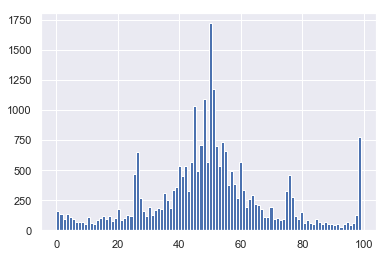

In [18]:
BES_reduced_with_na["euRefExpectationW7__100 - UK will definitely vote to leave the EU"].hist(bins=100);

In [101]:
euRefExpectationW8 = BES_Panel["euRefExpectationW8"].cat.codes.replace(101,np.nan).replace(-1,np.nan)
euRefExpectationW8.value_counts()

50.0     2096
48.0     1488
51.0     1469
45.0     1201
54.0      930
52.0      917
49.0      859
47.0      779
55.0      777
53.0      691
100.0     684
57.0      614
44.0      603
26.0      574
76.0      566
46.0      532
42.0      515
40.0      515
60.0      506
58.0      492
25.0      459
56.0      437
41.0      411
75.0      354
61.0      325
43.0      319
39.0      314
38.0      303
77.0      287
64.0      283
         ... 
19.0       89
13.0       88
5.0        88
86.0       87
71.0       86
81.0       85
83.0       82
10.0       81
21.0       81
11.0       76
15.0       75
82.0       71
89.0       71
18.0       70
97.0       68
90.0       67
88.0       60
95.0       60
84.0       59
7.0        56
9.0        55
92.0       55
6.0        53
12.0       51
8.0        50
87.0       43
93.0       42
91.0       42
94.0       33
96.0       30
Length: 101, dtype: int64

In [102]:
euRefExpectationW7 = BES_Panel["euRefExpectationW7"].cat.codes.replace(101,np.nan).replace(-1,np.nan)
euRefExpectationW7.value_counts()

50.0     1723
51.0     1176
48.0     1090
45.0     1032
100.0     778
54.0      734
47.0      707
52.0      699
55.0      663
26.0      648
44.0      572
49.0      569
60.0      568
40.0      538
42.0      534
53.0      533
57.0      493
46.0      492
25.0      472
76.0      461
41.0      452
58.0      388
56.0      376
39.0      364
38.0      336
61.0      336
75.0      330
43.0      329
35.0      307
64.0      290
         ... 
5.0        94
85.0       92
79.0       91
71.0       91
21.0       88
13.0       87
73.0       85
82.0       82
18.0       79
86.0       72
6.0        72
8.0        71
95.0       71
7.0        71
88.0       66
83.0       62
97.0       60
81.0       59
11.0       59
9.0        56
92.0       56
90.0       56
94.0       54
84.0       54
89.0       53
12.0       53
87.0       50
96.0       42
91.0       40
93.0       30
Length: 101, dtype: int64

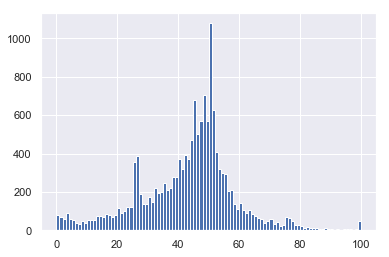

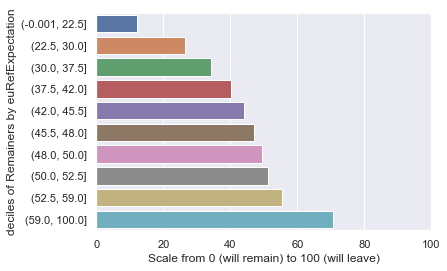

In [108]:
mean_expect_fixed = pd.concat([euRefExpectationW7,euRefExpectationW8],axis=1)[Remainers].mean(axis=1)
plt.figure()
mean_expect_fixed.hist(bins=100);
mean_expect_fixed_deciles = pd.qcut( mean_expect_fixed,
        10)
# mean_expect_fixed.groupby(mean_expect_fixed_deciles).mean()

plt.figure()
sns.barplot(x = mean_expect_fixed.groupby(mean_expect_fixed_deciles).mean().values,
            y = mean_expect_fixed.groupby(mean_expect_fixed_deciles).mean().index);
plt.xlim([0,100]);
plt.xlabel("Scale from 0 (will remain) to 100 (will leave)");
plt.ylabel("deciles of Remainers by euRefExpectation");

In [112]:
euRefExpectationW8[Remainers].value_counts().sort_index()

0.0      100
1.0       66
2.0       78
3.0      111
4.0       66
5.0       59
6.0       38
7.0       37
8.0       35
9.0       32
10.0      48
11.0      54
12.0      34
13.0      58
14.0      58
15.0      48
16.0      70
17.0      75
18.0      43
19.0      56
20.0      98
21.0      50
22.0      56
23.0      66
24.0      60
25.0     305
26.0     362
27.0     147
28.0      84
29.0      75
        ... 
71.0      27
72.0      28
73.0      18
74.0      31
75.0      69
76.0     107
77.0      56
78.0      33
79.0      16
80.0      27
81.0      12
82.0       9
83.0      13
84.0       8
85.0      14
86.0      17
87.0       9
88.0      12
89.0      13
90.0       8
91.0       9
92.0       9
93.0       5
94.0       4
95.0       5
96.0       5
97.0       5
98.0      11
99.0       6
100.0     50
Length: 101, dtype: int64

In [114]:
# who are the people who, given a range 0-100, choose only discrete points?

BES_reduced_with_na["euRefExpectationW8__100 - UK will definitely vote to leave the EU"][Remainers].value_counts().sort_index()

0.0     100
1.0      66
2.0      78
3.0     111
4.0      66
5.0      59
6.0      38
7.0      37
8.0      35
9.0      32
10.0     48
11.0     54
12.0     34
13.0     58
14.0     58
15.0     48
16.0     70
17.0     75
18.0     43
19.0     56
20.0     98
21.0     50
22.0     56
23.0     66
24.0     60
25.0    305
26.0    362
27.0    147
28.0     84
29.0     75
       ... 
70.0     51
71.0     27
72.0     28
73.0     18
74.0     31
75.0     69
76.0    107
77.0     56
78.0     33
79.0     16
80.0     27
81.0     12
82.0      9
83.0     13
84.0      8
85.0     14
86.0     17
87.0      9
88.0     12
89.0     13
90.0      8
91.0      9
92.0      9
93.0      5
94.0      4
95.0      5
96.0      5
97.0      5
98.0     11
99.0     50
Name: euRefExpectationW8__100 - UK will definitely vote to leave the EU, Length: 100, dtype: int64

In [109]:
BES_reduced_with_na["euRefExpectationW8__100 - UK will definitely vote to leave the EU"].value_counts()

50.0    2096
48.0    1488
51.0    1469
45.0    1201
54.0     930
52.0     917
49.0     859
47.0     779
55.0     777
53.0     691
99.0     684
57.0     614
44.0     603
26.0     574
76.0     566
46.0     532
42.0     515
40.0     515
60.0     506
58.0     492
25.0     459
56.0     437
41.0     411
75.0     354
61.0     325
43.0     319
39.0     314
38.0     303
77.0     287
64.0     283
        ... 
19.0      89
5.0       88
13.0      88
86.0      87
71.0      86
81.0      85
83.0      82
21.0      81
10.0      81
11.0      76
15.0      75
82.0      71
89.0      71
18.0      70
97.0      68
90.0      67
95.0      60
88.0      60
84.0      59
7.0       56
9.0       55
92.0      55
6.0       53
12.0      51
8.0       50
87.0      43
91.0      42
93.0      42
94.0      33
96.0      30
Name: euRefExpectationW8__100 - UK will definitely vote to leave the EU, Length: 100, dtype: int64

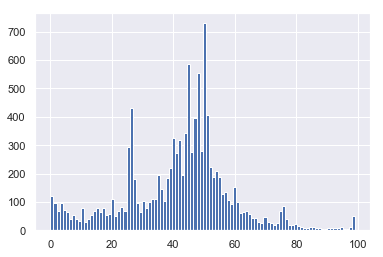

In [22]:
BES_reduced_with_na["euRefExpectationW7__100 - UK will definitely vote to leave the EU"][Remainers].hist(bins=100);

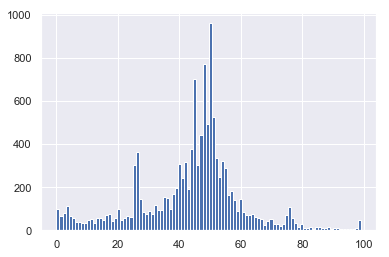

In [23]:
BES_reduced_with_na["euRefExpectationW8__100 - UK will definitely vote to leave the EU"][Remainers].hist(bins=100);

In [27]:
BES_Panel["regretsIHaveAFewEUW9"].value_counts()

No            26774
Yes             790
Don't know      684
Name: regretsIHaveAFewEUW9, dtype: int64

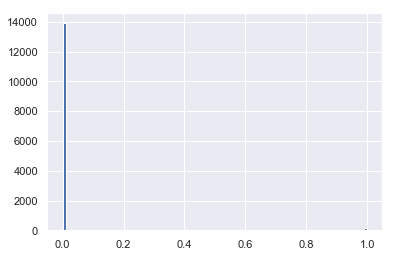

In [26]:
BES_reduced_with_na["regretsIHaveAFewEUW9_Yes"][Remainers].hist(bins=100);

In [42]:
mean_expect = BES_reduced_with_na[["euRefExpectationW7__100 - UK will definitely vote to leave the EU","euRefExpectationW8__100 - UK will definitely vote to leave the EU"]][Remainers].mean(axis=1)
# mean_expect

6        28.0
8        32.0
9        54.0
17       41.0
18       42.0
21        NaN
23        NaN
29       30.5
31       23.0
32        NaN
37       50.0
40       53.0
44       50.5
45        8.5
47       45.0
48       23.0
50       41.5
51       44.0
55       36.5
56        NaN
58       51.0
60       52.0
61       50.0
62       45.0
65       43.5
66       25.0
68       55.5
74        NaN
75       26.5
76       27.0
         ... 
73610     NaN
73621     NaN
73623     NaN
73624     NaN
73626     NaN
73633     NaN
73634     NaN
73635     NaN
73636     NaN
73637     NaN
73638     NaN
73641     NaN
73646     NaN
73649     NaN
73652     NaN
73660     NaN
73662     NaN
73665     NaN
73666     NaN
73669     NaN
73670     NaN
73675     NaN
73680     NaN
73682     NaN
73685     NaN
73688     NaN
73690     NaN
73691     NaN
73696     NaN
73701     NaN
Length: 26047, dtype: float32

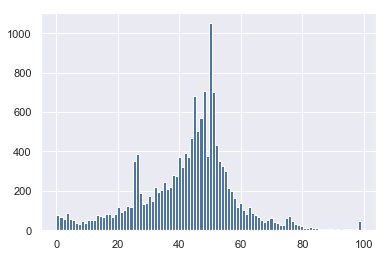

In [47]:
mean_expect.hist(bins=100);

In [57]:
mean_expect_deciles = pd.qcut( mean_expect,
        10)
mean_expect.groupby(mean_expect_deciles).mean()

(-0.001, 22.0]    11.948986
(22.0, 30.0]      26.261562
(30.0, 37.5]      34.198524
(37.5, 42.0]      40.133530
(42.0, 45.5]      44.213894
(45.5, 48.0]      47.134102
(48.0, 50.0]      49.542786
(50.0, 52.5]      51.340763
(52.5, 59.0]      55.393822
(59.0, 99.0]      70.415764
dtype: float32

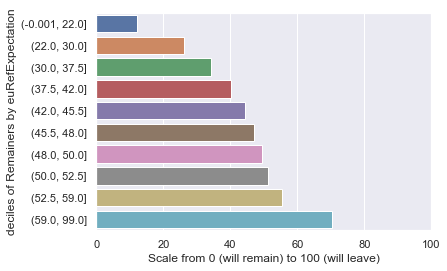

In [56]:
sns.barplot(x = mean_expect.groupby(expect_decilesW8).mean().values,
            y = mean_expect.groupby(expect_decilesW8).mean().index);
plt.xlim([0,100]);
plt.xlabel("Scale from 0 (will remain) to 100 (will leave)");
plt.ylabel("deciles of Remainers by euRefExpectation");

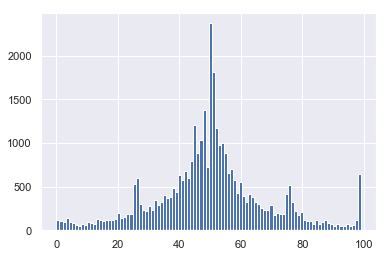

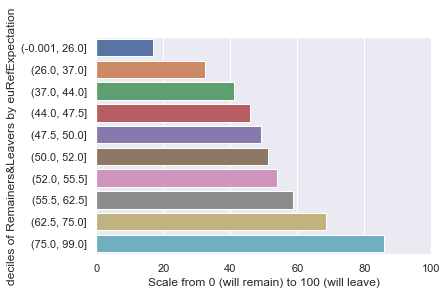

In [64]:
mean_expect_all = BES_reduced_with_na[["euRefExpectationW7__100 - UK will definitely vote to leave the EU","euRefExpectationW8__100 - UK will definitely vote to leave the EU"]].mean(axis=1)
plt.figure()
mean_expect_all.hist(bins=100);
mean_expect_all_deciles = pd.qcut( mean_expect_all,
        10)
mean_expect_all.groupby(mean_expect_all_deciles).mean()

plt.figure()
sns.barplot(x = mean_expect_all.groupby(mean_expect_all_deciles).mean().values,
            y = mean_expect_all.groupby(mean_expect_all_deciles).mean().index);
plt.xlim([0,100]);
plt.xlabel("Scale from 0 (will remain) to 100 (will leave)");
plt.ylabel("deciles of Remainers&Leavers by euRefExpectation");

In [35]:
expect_decilesW8 = pd.qcut( BES_reduced_with_na["euRefExpectationW8__100 - UK will definitely vote to leave the EU"][Remainers],
        10)

In [37]:
BES_reduced_with_na["euRefExpectationW8__100 - UK will definitely vote to leave the EU"][Remainers].groupby(expect_decilesW8).mean()

euRefExpectationW8__100 - UK will definitely vote to leave the EU
(-0.001, 20.0]     9.596519
(20.0, 30.0]      25.847876
(30.0, 40.0]      36.540726
(40.0, 44.0]      42.627331
(44.0, 47.0]      45.820885
(47.0, 49.0]      48.388931
(49.0, 50.0]      50.000000
(50.0, 54.0]      52.253670
(54.0, 60.0]      57.001976
(60.0, 99.0]      73.054604
Name: euRefExpectationW8__100 - UK will definitely vote to leave the EU, dtype: float32

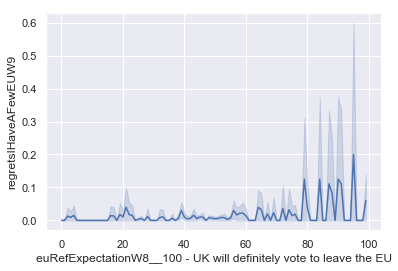

In [67]:
sns.lineplot(x = BES_reduced_with_na["euRefExpectationW8__100 - UK will definitely vote to leave the EU"][Remainers],
             y = BES_Panel["regretsIHaveAFewEUW9"][Remainers] == "Yes");

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


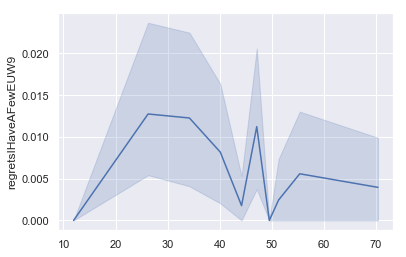

In [91]:
sns.lineplot(x = pd.Series([decile_means.loc[x] if pd.notnull(x) else np.nan for x in mean_expect_deciles.values]),
             y = (BES_Panel["regretsIHaveAFewEUW9"][Remainers] == "Yes").astype('float'));

In [90]:
pd.Series([decile_means.loc[x] if pd.notnull(x) else np.nan for x in mean_expect_deciles.values])

0        26.261562
1        34.198524
2        55.393822
3        40.133530
4        40.133530
5              NaN
6              NaN
7        34.198524
8        26.261562
9              NaN
10       49.542786
11       55.393822
12       51.340763
13       11.948986
14       44.213894
15       26.261562
16       40.133530
17       44.213894
18       34.198524
19             NaN
20       51.340763
21       51.340763
22       49.542786
23       44.213894
24       44.213894
25       26.261562
26       55.393822
27             NaN
28       26.261562
29       26.261562
           ...    
26017          NaN
26018          NaN
26019          NaN
26020          NaN
26021          NaN
26022          NaN
26023          NaN
26024          NaN
26025          NaN
26026          NaN
26027          NaN
26028          NaN
26029          NaN
26030          NaN
26031          NaN
26032          NaN
26033          NaN
26034          NaN
26035          NaN
26036          NaN
26037          NaN
26038       

In [74]:
# mean_expect_deciles

In [72]:
decile_means = mean_expect.groupby(mean_expect_deciles).mean()
decile_means

(-0.001, 22.0]    11.948986
(22.0, 30.0]      26.261562
(30.0, 37.5]      34.198524
(37.5, 42.0]      40.133530
(42.0, 45.5]      44.213894
(45.5, 48.0]      47.134102
(48.0, 50.0]      49.542786
(50.0, 52.5]      51.340763
(52.5, 59.0]      55.393822
(59.0, 99.0]      70.415764
dtype: float32

In [83]:
decile_means.loc[ mean_expect_deciles.values[0] ]

26.261562

In [ ]:
decile_means.loc[x]